# **CONDITIONAL BUFFERS**
*To create buffer around polygons (builtup features) based on two attributes ‘s_type’ (sprawl type) and ‘s_patterns’ (sprawl pattern). The required buffer distances are given below.*
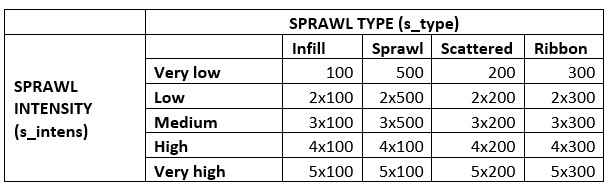
- Open the builtup file
- Add buffer distance column based on sprawl type
- Add buffer distance column based on sprawl intensity
- Add buffer distance column and compute the product of above two columns
- Based on above buffer distance create buffer
- Write the output to geopackage file

In [ ]:
#open the vector data
import os
data_pkg_path = 'dummy_data_f'
filename = 'builtup.gpkg'
path = os.path.join(data_pkg_path, filename)

In [15]:
#how to list all layers in geopackge? Hint: use fiona package
import fiona
layers = fiona.listlayers(path)
layers

In [16]:
import geopandas as gpd
builtup = gpd.read_file(path, layer='builtup')
print(builtup.info())

In [17]:
#add field 'buff_type' to assign values accordingly: infill-100, sprawl-500, scattered-200, ribbon-300
#df.loc[df[‘column name’] condition, ‘new column name’] = ‘value if condition is met’ 

builtup.loc[builtup['s_type'] == 'Infill', 'buff_type'] = 100
builtup.loc[builtup['s_type'] == 'Sprawl', 'buff_type'] = 500
builtup.loc[builtup['s_type'] == 'Scattered', 'buff_type'] = 200
builtup.loc[builtup['s_type'] == 'Ribbon', 'buff_type'] = 300
builtup

In [18]:
#add field 'buff_inten' to assign values accordingly: very low-1, low-2, medium-3, high-4, very high-5
#df.loc[df[‘column name’] condition, ‘new column name’] = ‘value if condition is met’ 

builtup.loc[builtup['s_intens'] == 'very low', 'buff_inten'] = 1
builtup.loc[builtup['s_intens'] == 'low', 'buff_inten'] = 2
builtup.loc[builtup['s_intens'] == 'medium', 'buff_inten'] = 3
builtup.loc[builtup['s_intens'] == 'high', 'buff_inten'] = 4
builtup.loc[builtup['s_intens'] == 'very high', 'buff_inten'] = 5
builtup

In [19]:
#add field 'buff_f' and multiply 'buff_type' and 'buf_inten'. This is the final distance for creating buffer
builtup['buff_f']=builtup['buff_type'] * builtup['buff_inten']
builtup

In [20]:
#create buffer around each polygon based on buff_f field values
buffer_op = builtup.buffer(distance=builtup['buff_f'])
#print(buffer_op.info())

<class 'geopandas.geoseries.GeoSeries'>
RangeIndex: 5938 entries, 0 to 5937
Series name: None
Non-Null Count  Dtype   
--------------  -----   
5938 non-null   geometry
dtypes: geometry(1)
memory usage: 46.5 KB
None


In [21]:
#save buffered output to new file
output_dir = 'output'
output_filename = 'con_buf.gpkg'
output_path = os.path.join(output_dir, output_filename)

buffer_op.to_file(driver='GPKG', filename=output_path, encoding='utf-8')
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output\con_buf.gpkg
